In [1]:
import pydicom

In [2]:
from pydicom.data import get_testdata_files

In [3]:
import numpy as np
from os.path import dirname, join
import matplotlib.pyplot as plt

import pydicom
from pydicom.data import get_testdata_files
from pydicom.filereader import read_dicomdir

dcm = pydicom.dcmread("pelda2.dcm")
print(dcm)


(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date              DA: '19970630'
(0008, 0013) Instance Creation Time              TM: '170131'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.4320.5030.618853748224074515734894306203
(0008, 0020) Study Date                          DA: '19970630'
(0008, 0021) Series Date                         DA: '19970630'
(0008, 0022) Acquisition Date                    DA: '19970630'
(0008, 0023) Content Date                        DA: '19970630'
(0008, 0030) Study Time                          TM: '165846.0000'
(0008, 0031) Series Time                         TM: '170035.0000'
(0008, 0032) Acquisition Time                    TM: '170054'
(0008, 0033) Content Time                        TM: '170131'
(0008, 0050) Accessi

In [4]:
# i need these from the dicomheader to calculate HU as HU = grayvalue * slope + intercept
intercept = int(dcm.RescaleIntercept)
slope = int(dcm.RescaleSlope)
mypixels = dcm.pixel_array * slope + intercept


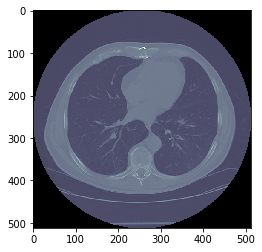

In [5]:
plt.imshow(mypixels, cmap=plt.cm.bone) 

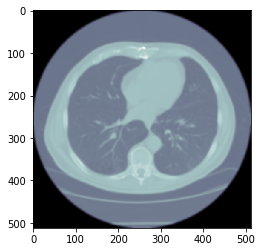

In [6]:
# gaussian smoothing 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html
# TODO: how much sigma to use
from scipy.ndimage import gaussian_filter
mypixels = gaussian_filter(mypixels, sigma=2)
plt.imshow(mypixels,  cmap=plt.cm.bone )

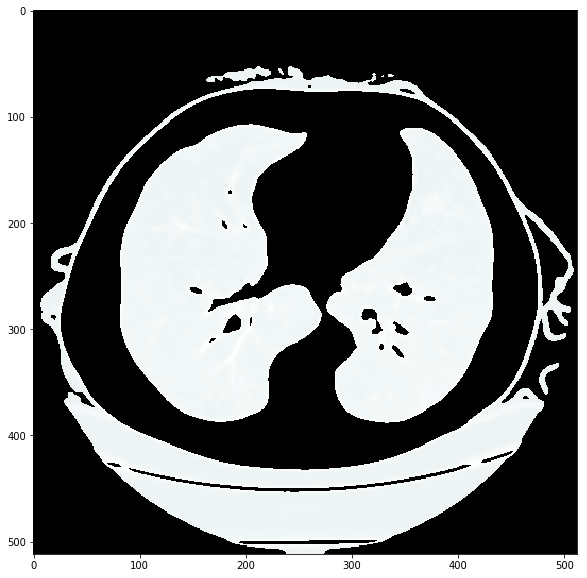

In [7]:
plt.rcParams["figure.figsize"] = (20,10)
# gray level tresholding
# TODO: experiment with other than -500

mask = (mypixels > -500) | (mypixels < -980)
mypixels[mask] = -10000
plt.imshow(mypixels,  cmap=plt.cm.bone )

In [8]:
hstp = dcm.pixel_array * slope + intercept


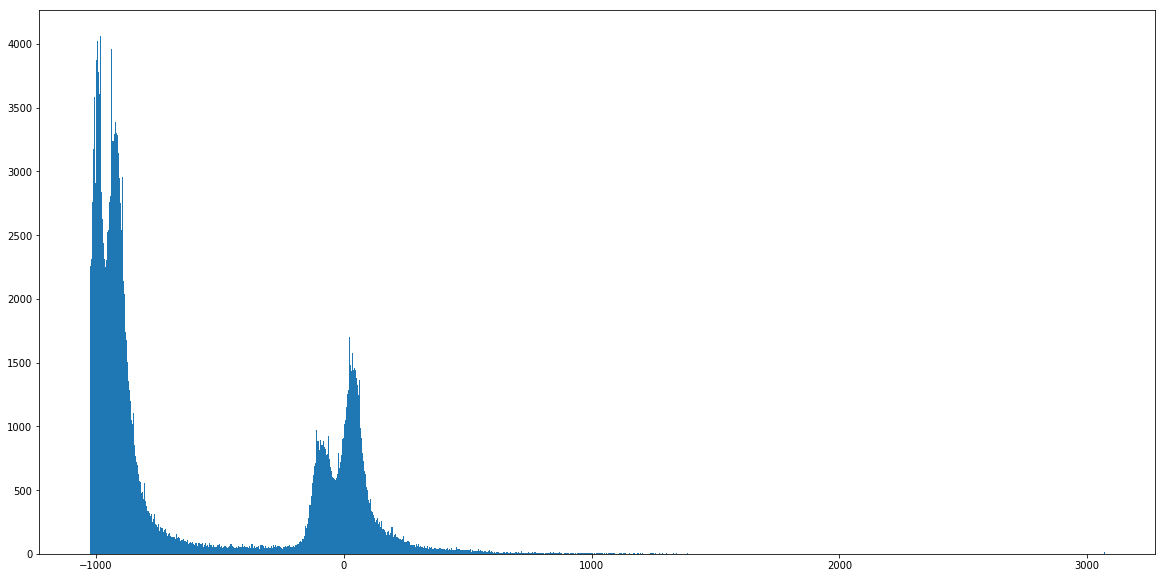

In [9]:
hst = (hstp > -1500) & (hstp != -1024) & (hstp != -1000) 
hst = hstp[hst]

plt.hist(hst, bins=1000)
plt.show()

<IPython.core.display.Javascript object>


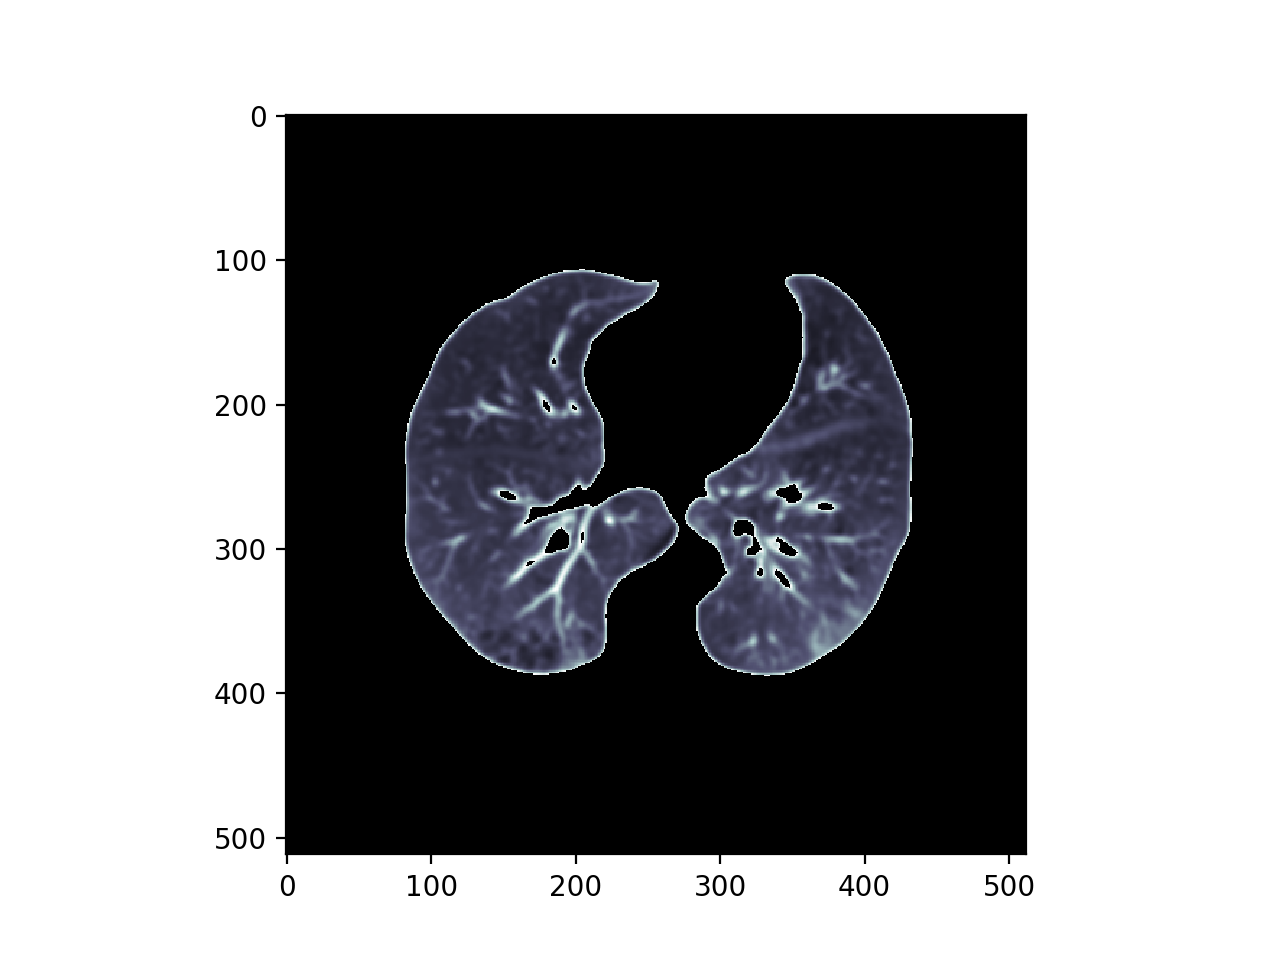

In [10]:

# floodfill non-lung region
# ASK: should i implement this manually?
from skimage.morphology import flood_fill
filled = mypixels.copy()
xmax, ymax = filled.shape
i = 0


flood_fill(filled, (i, 0), -3000, tolerance=2500,connectivity=1, inplace=True) # int(ymax*0.15)
flood_fill(filled, (i, ymax-1), -3000, tolerance=2500,connectivity=1, inplace=True) # int(ymax*0.85)

flood_fill(filled, (xmax-1, ymax-1), -3000, tolerance=2500,connectivity=1, inplace=True) # int(xmax*0.85)
flood_fill(filled, (xmax-1, i), -3000, tolerance=2500,connectivity=1, inplace=True) # int(xmax*0.85)


    
filled[filled == -10000] = -1024
filled[filled == -3000] = -1024
%matplotlib nbagg
plt.imshow(filled,  cmap=plt.cm.bone )